In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'key-file:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5665552%2F9347346%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240910%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240910T213435Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da70fd479572790ec10b26b831fc2416c2ff52a494851fd7a0379632d7951b13f3973205b2af3105f52f3acee7f2914f9db8899e937156dfd7695fadc9439ebd86e885dcc98939b719ebb761cb77fdb1167f05f402638febe43d45a44fad23e8f15befbc2840b37dcd76c8ae767c977fcc1b7addc4214fdb25a1924c1043dd78690707ffa34264d470a57cef971ecc171fbc1a2cd7af22dc067c58bee9d2fce10bd2ced020da845f7526269d72c4fb6aa8ccb6629aef0e87a76f8e17e7a3a2c7a73289947fb06e94a39ee673e7511cab6d1b107f82d6b61a87c9c5d8cdd6fe7f7686a1d353ac9fd84496b22913519c498d9392d4fad3c44fa92311a38d783083e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import ee
!pip install wxee
import wxee

import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.8.2 requires cubinlinker, which is not installed.
cudf 24.8.2 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.8.2 requires ptxcompiler, which is not installed.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 24.8.2 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.8.2 requires cuda-python<12.0a0,>=11.7.1, but you have cuda-python 12.6.0 which is incompatible.
distributed 2024.7.1 requires dask==2024.7.1, but you have dask 2024.8.1 which is

In [ ]:
# Set the path to the service account key file
service_account = 'ncchaudhari10@ee-ncchaudhari10.iam.gserviceaccount.com'
key_file = '/kaggle/input/key-file/ee-ncchaudhari10-86b9b92e749a.json'

# Use the service account for authentication
credentials = ee.ServiceAccountCredentials(service_account, key_file)
ee.Initialize(credentials)

is_train = False

In [ ]:
F101992 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F101992').select('stable_lights')
F101993 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F101993').select('stable_lights')
F101994 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F101994').select('stable_lights')
F121994 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121994').select('stable_lights')
F121995 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121995').select('stable_lights')
F121996 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121996').select('stable_lights')
F121997 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121997').select('stable_lights')
F121998 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121998').select('stable_lights')
F121999 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121999').select('stable_lights')
F141997 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F141997').select('stable_lights')
F141998 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F141998').select('stable_lights')
F141999 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F141999').select('stable_lights')
F142000 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F142000').select('stable_lights')
F142001 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F142001').select('stable_lights')
F142002 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F142002').select('stable_lights')
F142003 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F142003').select('stable_lights')
F152000 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152000').select('stable_lights')
F152001 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152001').select('stable_lights')
F152002 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152002').select('stable_lights')
F152003 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152003').select('stable_lights')
F152004 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152004').select('stable_lights')
F152005 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152005').select('stable_lights')
F152006 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152006').select('stable_lights')
F152007 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152007').select('stable_lights')
F162004 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162004').select('stable_lights')
F162005 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162005').select('stable_lights')
F162006 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162006').select('stable_lights')
F162007 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162007').select('stable_lights')
F162008 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162008').select('stable_lights')
F162009 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162009').select('stable_lights')
F182010 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182010').select('stable_lights')
F182011 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182011').select('stable_lights')
F182012 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182012').select('stable_lights')

collections = [F101992, F101993, F101994, F121994, F121995, F121996, F121997, F121998, F121999, F141997, F141998,
                    F141999, F142000, F142001,F142002, F142003, F152000, F152001, F152002, F152003, F152004, F152005,
                    F152006, F152007,F162004, F162005, F162006, F162007, F162008, F162009, F182010, F182011, F182012]

c = [-3.06516, -2.0638, -1.68421, -1.71621, 0.530922, 0.303469, -0.18513, 0.490138, 1.800988, -0.6186,
         -0.91352, -1.37993, 0.061872, 0.249452, 1.127103, 0.866522,0, 0.005164,-0.04462, -0.27189, -0.06977, 0.449229,
         0.913485, 0.644785, -0.02563, -0.54115, -0.38377, 0.629564, 0.745403, -0.15161, 6.22332, 1.427157, 3.866698]

b = [-0.00698, -0.00726, -0.00695, -0.00454, 0.00011, -0.00176, -0.00057, 0.001236, 0.002969, -0.0094,
     -0.00929, -0.00889, -0.00469, -0.00452, -0.00221, -0.00351, 0, 8.94e-05, 0.000117, -0.0085, -0.00912, -0.00601,
     -0.00595, -0.00675, -0.00496, -0.0094, -0.0061, -0.00084, -0.00062, -0.00278, 0.014627,0.002877, 0.007962]

a = [1.519907, 1.516595, 1.491333, 1.331971, 0.984465, 1.111207, 1.034429, 0.905787, 0.761106, 1.603921,
      1.603648, 1.586457, 1.294471, 1.275902, 1.128708, 1.206319, 1, 1.002879, 0.987943, 1.555808, 1.591033, 1.401146,
      1.381139,1.448976, 1.317581, 1.613536, 1.41435, 1.040815, 1.037042, 1.193437, -0.08536, 0.774923, 0.355542]

images = [0 for _ in range(33)]
count = 0
total_list = []
images_correct = [0 for _ in range(33)]

def fun3(raw,correct):
    out = correct.where(raw.lt(5.0),raw.float())
    return out

for i in range(33):
    images[i] = ee.Image(a[i]).multiply(collections[i].float()).add(ee.Image(b[i]).multiply(collections[i].float().pow(2))).add(ee.Image(c[i]))
    images_correct[i] = fun3(collections[i],images[i]).select('constant')

In [ ]:
lats, late = 30.2672-2.5, 30.2672+2.5
lons, lone = -97.7431-2.5, -97.7431+2.5
aoi = ee.Geometry.Polygon(
        [[[lons, lats],
          [lone, lats],
          [lone, late],
          [lons, late]]])
coords = aoi.coordinates().getInfo()[0]
coords

[[-100.2431, 27.7672],
 [-95.2431, 27.7672],
 [-95.2431, 32.7672],
 [-100.2431, 32.7672],
 [-100.2431, 27.7672]]

In [ ]:
dmsp_image_2012 = images_correct[-1]

In [ ]:
dataset = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG').filter(ee.Filter.date('2012-01-01', '2013-12-31'))
viirs_image_2012 = dataset#.select('avg_rad').mean()

In [ ]:
viirs_image_2012 = viirs_image_2012.set('system:time_start', 0)
ds_viirs = viirs_image_2012.wx.to_xarray(region=aoi.bounds(), scale=463.83)

Requesting data:   0%|          | 0/21 [00:00<?, ?it/s]

Text(0.5, 1.0, 'VIIRS 2012 over Austin')

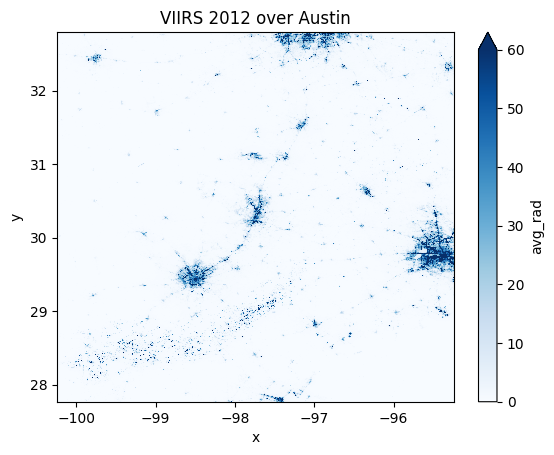

In [ ]:
import matplotlib.pyplot as plt
ds_viirs.sel(time=slice('2012','2012')).mean(dim='time').avg_rad.plot(vmin=0, vmax=60, cmap='Blues')
plt.title('VIIRS 2012 over Austin')

In [ ]:
dmsp_image_2012 = dmsp_image_2012.set('system:time_start', 0)
ds_dmsp = dmsp_image_2012.wx.to_xarray(region=aoi.bounds(), scale=927.67)

Downloading:   0%|          | 0.00/154k [00:00<?, ?iB/s]

Text(0.5, 1.0, 'DMSP 2012 over Austin')

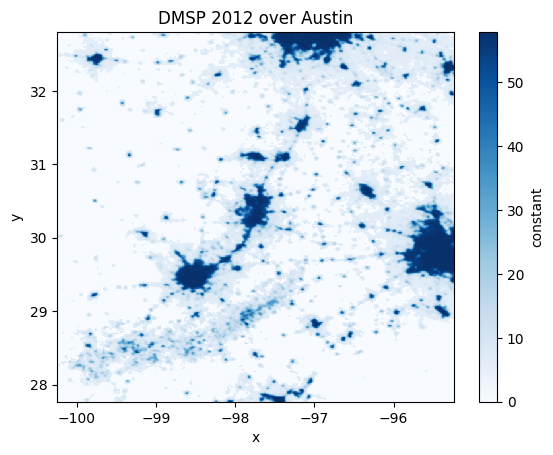

In [ ]:
ds_dmsp.constant.plot(cmap='Blues')
plt.title('DMSP 2012 over Austin')

In [ ]:
dmsp_image_2012_ = ee.ImageCollection('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS').filter(ee.Filter.date('2012-01-01', '2012-12-31'))
dmsp_image_2012_ = dmsp_image_2012_.set('system:time_start', 0)
ds_dmsp_ = dmsp_image_2012_.wx.to_xarray(region=aoi.bounds(), scale=927.67)

Requesting data:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 1.0, 'DMSP - VIIRS 2012 over Austin')

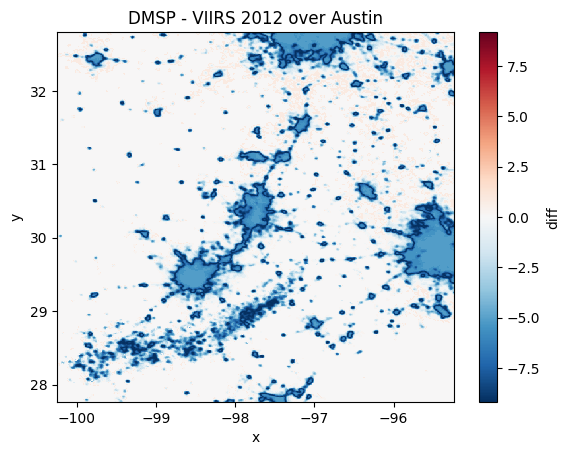

In [ ]:
dmsp_diff = ds_dmsp.constant.values - ds_dmsp_.stable_lights.values
ds_dmsp_['diff'] = (('time', 'y', 'x'), dmsp_diff)
ds_dmsp_['diff'].plot()
plt.title('DMSP - VIIRS 2012 over Austin')

In [ ]:
ds_viirs_ = ds_viirs.sel(time=slice('2012','2012')).mean(dim='time').interp(x=ds_dmsp.x.values, y=ds_dmsp.y.values,method="cubic", kwargs={"fill_value": "extrapolate"})
ds_viirs_

<xarray.Dataset> Size: 6MB
Dimensions:      (y: 604, x: 601)
Coordinates:
    spatial_ref  int64 8B 0
  * x            (x) float64 5kB -100.2 -100.2 -100.2 ... -95.26 -95.25 -95.25
  * y            (y) float64 5kB 32.8 32.79 32.78 32.77 ... 27.79 27.78 27.77
Data variables:
    avg_rad      (y, x) float64 3MB 0.3 0.06632 0.1779 ... 0.04162 0.01582
    cf_cvg       (y, x) float64 3MB 15.74 11.08 11.18 ... 12.14 11.81 11.91

In [ ]:
from torch.utils.tensorboard import SummaryWriter

In [ ]:
import xarray as xr
import numpy as np
ds_dmsp = ds_dmsp.constant # xr.open_dataset('dmsp_2012_austin.nc').constant
ds_viirs = ds_viirs_.avg_rad # xr.open_dataset('viirs_2012_austin.nc').avg_rad

In [ ]:
x_train = ds_viirs.values.astype(np.float32)
y_train = ds_dmsp.values[0,:,:].astype(np.float32)

In [ ]:
import numpy as np

def unpatchify(patches, img_shape):
    patch_size = patches.shape[1]
    assert patches.shape[0] == (img_shape[0] // patch_size) * (img_shape[1] // patch_size), "Patches and image shape are not compatible"

    img = np.zeros(img_shape, dtype=patches.dtype)
    patch_idx = 0

    for i in range(0, img_shape[0], patch_size):
        for j in range(0, img_shape[1], patch_size):
            img[i:i + patch_size, j:j + patch_size] = patches[patch_idx]
            patch_idx += 1

    return img

def patchify(img, patch_size):
    img_shape = img.shape
    patches = np.array([img[i:i + patch_size, j:j + patch_size] for i in range(0, img_shape[0], patch_size) for j in range(0, img_shape[1], patch_size)])
    return patches

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.optim as optim
class ncDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __getitem__(self, index):
        x = torch.from_numpy(self.data[index]).unsqueeze(0)
        y = torch.from_numpy(self.targets[index]).unsqueeze(0)
        # x = self.data[index]
        # y = self.targets[index]
        # x = x.to(dtype=torch.float32)
        # y = y.to(dtype=torch.float32)
        return x, y

    def __len__(self):
        return len(self.data)


In [ ]:
patch_size = 32
img = x_train[:576,:576]
patches = patchify(img, patch_size)

In [ ]:
reconstructed_img = unpatchify(patches, img.shape)

In [ ]:
assert np.allclose(reconstructed_img, img), "The reconstructed image is not the same as the original image"

In [ ]:
np.sum(reconstructed_img == img)

331776

In [ ]:
x_train_max = x_train.max()
y_train_max = y_train.max()
x_train /= x_train_max
y_train /= y_train_max

# Diffusion needs data in [-1,1]
x_train = (x_train * 2) - 1
y_train = (y_train * 2) - 1


x_train_patches = patchify(x_train[:576,:576], patch_size)
y_train_patches = patchify(y_train[:576,:576], patch_size)
x_train_patches.shape

(324, 32, 32)

In [ ]:

x_val_patches = x_train_patches[200:300]
y_val_patches = y_train_patches[200:300]

x_test_patches = x_train_patches[300:]
y_test_patches = y_train_patches[300:]

x_train_patches = x_train_patches[:200]

y_train_patches = y_train_patches[:200]

In [ ]:
train_dataset = ncDataset(x_train_patches, y_train_patches)
val_dataset = ncDataset(x_val_patches, y_val_patches)
test_dataset = ncDataset(x_val_patches, y_val_patches)

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=20, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=20, shuffle=True)

In [ ]:
!pip install torch torchvision diffusers

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 39.9 MB/s eta 0:00:00a 0:00:01


In [ ]:
for batch in train_dataloader:
    data, targets = batch
    print(data.size())  # Should print torch.Size([16, 1, 30, 30])
    print(targets.size())  # Should print torch.Size([16, 1, 30, 601])
    break

torch.Size([20, 1, 32, 32])
torch.Size([20, 1, 32, 32])


In [ ]:
writer = SummaryWriter("runs/ddpm")

In [ ]:
# Train function with validation
def train(model, train_dataloader, val_dataloader, criterion, optimizer, scheduler, device):
    model.train()
    train_loss = 0.0
    for batch in train_dataloader:
        lr, hr = batch  # Low resolution (lr) and high resolution (hr)
        lr, hr = lr.to(device), hr.to(device)

        # Sample noise to add to the high-resolution images
        noise = torch.randn_like(hr)

        # Sample a random timestep for each image
        timesteps = torch.randint(0, scheduler.config.num_train_timesteps, (lr.shape[0],)).long().to(device)

        # Get the noisy high-resolution images
        noisy_images = scheduler.add_noise(hr, noise, timesteps)

        # Concatenate the low-resolution and noisy high-resolution images
        x_t = torch.cat((noisy_images, lr), dim=1)

        # Get the model's prediction
        noise_pred = model(x_t, timesteps).sample

        # Compute the loss
        loss = criterion(noise_pred, noise)
        train_loss += loss.item()

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

    train_loss /= len(train_dataloader)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_dataloader:
            lr, hr = batch  # Low resolution (lr) and high resolution (hr)
            lr, hr = lr.to(device), hr.to(device)

            # Sample noise to add to the high-resolution images
            noise = torch.randn_like(hr)

            # Sample a random timestep for each image
            timesteps = torch.randint(0, scheduler.config.num_train_timesteps, (lr.shape[0],)).long().to(device)

            # Get the noisy high-resolution images
            noisy_images = scheduler.add_noise(hr, noise, timesteps)

            # Concatenate the low-resolution and noisy high-resolution images
            x_t = torch.cat((noisy_images, lr), dim=1)

            # Get the model's prediction
            noise_pred = model(x_t, timesteps).sample

            # Compute the loss
            loss = criterion(noise_pred, noise)
            val_loss += loss.item()

    val_loss /= len(val_dataloader)

    return train_loss, val_loss

In [ ]:
import torch
import torch.nn as nn
from tqdm import tqdm
from torch.optim import Adam
from diffusers import DDPMScheduler, UNet2DModel
from copy import deepcopy

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model setup
model = UNet2DModel(
    sample_size=patch_size,  # Input image size
    in_channels=2,           # Input channels (low resolution + noisy high resolution)
    out_channels=1,          # Output channels (high resolution)
    layers_per_block=4,
    block_out_channels=(64, 128, 256, 512),
).to(device)

# Scheduler setup
scheduler = DDPMScheduler(
    num_train_timesteps=1000,  # Number of diffusion steps
    beta_schedule="linear"
)

# Optimizer
optimizer = Adam(model.parameters(), lr= 1e-4)

# Loss function
criterion = nn.MSELoss()

# Hyperparameters
num_epochs = 5000
print_interval = 10
patience = 50
best_val_loss = float('inf')
counter = 0
best_model = None

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
# Main training loop
is_train = True
if is_train:
    for epoch in range(1, num_epochs + 1):
        train_loss, val_loss = train(model, train_dataloader, val_dataloader, criterion, optimizer, scheduler, device)

        # Log losses to TensorBoard
        writer.add_scalars("Loss", {"Train": train_loss, "Validation": val_loss}, epoch)


        # Print progress
        if epoch % print_interval == 0:
            print(f"Epoch [{epoch}/{num_epochs}] - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Close TensorBoard writer
    writer.close()

Epoch [10/5000] - Train Loss: 0.0524, Validation Loss: 0.0477
Epoch [20/5000] - Train Loss: 0.0254, Validation Loss: 0.0208
Epoch [30/5000] - Train Loss: 0.0207, Validation Loss: 0.0175
Epoch [40/5000] - Train Loss: 0.0332, Validation Loss: 0.0285
Epoch [50/5000] - Train Loss: 0.0222, Validation Loss: 0.0225
Epoch [60/5000] - Train Loss: 0.0265, Validation Loss: 0.0400
Epoch [70/5000] - Train Loss: 0.0200, Validation Loss: 0.0186
Epoch [80/5000] - Train Loss: 0.0199, Validation Loss: 0.0391
Epoch [90/5000] - Train Loss: 0.0261, Validation Loss: 0.0188
Epoch [100/5000] - Train Loss: 0.0160, Validation Loss: 0.0208
Epoch [110/5000] - Train Loss: 0.0143, Validation Loss: 0.0265
Epoch [120/5000] - Train Loss: 0.0190, Validation Loss: 0.0213
Epoch [130/5000] - Train Loss: 0.0196, Validation Loss: 0.0201
Epoch [140/5000] - Train Loss: 0.0168, Validation Loss: 0.0152
Epoch [150/5000] - Train Loss: 0.0182, Validation Loss: 0.0176
Epoch [160/5000] - Train Loss: 0.0186, Validation Loss: 0.0146
E

In [ ]:
model_save_path = "best_model_diffusion.pth"
best_model = deepcopy(model)
if is_train:
    torch.save(best_model.state_dict(), model_save_path)

In [ ]:
loaded_model = UNet2DModel(
    sample_size=patch_size,  # Input image size
    in_channels=2,           # Input channels (low resolution + noisy high resolution)
    out_channels=1,          # Output channels (high resolution)
    layers_per_block=4,
    block_out_channels=(64, 128, 256, 512),
).to(device)

loaded_model.load_state_dict(torch.load(model_save_path))
loaded_model.eval()

/tmp/ipykernel_36/571478396.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_save_path))


UNet2DModel(
  (conv_in): Conv2d(2, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=64, out_features=256, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=256, out_features=256, bias=True)
  )
  (down_blocks): ModuleList(
    (0): DownBlock2D(
      (resnets): ModuleList(
        (0-3): 4 x ResnetBlock2D(
          (norm1): GroupNorm(32, 64, eps=1e-05, affine=True)
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=256, out_features=64, bias=True)
          (norm2): GroupNorm(32, 64, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (conv): Conv2d(64, 64, ker

In [ ]:
with torch.no_grad():
    outputs = []
    # Get a batch from the test_loader
    for batch in test_dataloader:
        lr, hr = batch
        lr, hr = lr.to(device), hr.to(device)

        num_samples = len(lr)
        image_size = lr.shape[-1]  # Assuming square images

        # Start from pure noise
        samples = torch.randn((num_samples, 1, patch_size, patch_size)).to(device)

        # Initialize the progress bar for the denoising steps
        progress_bar = tqdm(total=scheduler.config.num_train_timesteps, desc="Denoising Timesteps", leave=True)

        # Iterate over timesteps to denoise
        for t in scheduler.timesteps:  # Use scheduler timesteps
            timesteps = torch.full((num_samples,), t, device=device, dtype=torch.long)

            # Concatenate noise sample and grayscale input
            x_t = torch.cat((samples, lr), axis=1)

            # Predict the noise at the current timestep
            noise_pred = loaded_model(x_t, timesteps).sample

            # Get the previous sample using DDIM's step function
            samples = scheduler.step(noise_pred, t, samples).prev_sample

            # Update the progress bar
            progress_bar.update(1)

        # Close the progress bar after completion
        progress_bar.close()

        # Append the final denoised samples
        outputs.append(samples)

In [ ]:
pred_sr = outputs[0].cpu().numpy()[:,0,:,:]
pred_sr.shape

(20, 32, 32)

In [ ]:
x_train = ds_viirs.values.astype(np.float32)
y_train = ds_dmsp.values[0,:,:].astype(np.float32)
img = x_train[:576,:576]

x_train_max = x_train.max()
y_train_max = y_train.max()

x_train /= x_train_max
y_train /= y_train_max

x_train = (x_train * 2) - 1
y_train = (y_train * 2) - 1

x_train_patches = patchify(x_train[:576,:576], patch_size)[:,np.newaxis,:,:]
x_train_patches_tensor = torch.from_numpy(x_train_patches).to(device)

x_train_patches_tensor.shape

torch.Size([324, 1, 32, 32])

In [ ]:
with torch.no_grad():

      lr = x_train_patches_tensor.to(device)

      # Start from pure noise
      samples = torch.randn_like(lr)

      # Initialize the progress bar for the denoising steps
      progress_bar = tqdm(total=scheduler.config.num_train_timesteps, desc="Denoising Timesteps", leave=True)

      # Iterate over timesteps to denoise
      for t in scheduler.timesteps:  # Use scheduler timesteps
          timesteps = torch.full((len(samples),), t, device=device, dtype=torch.long)

          # Concatenate noise sample and grayscale input
          x_t = torch.cat((samples, lr), axis=1)

          # Predict the noise at the current timestep
          noise_pred = loaded_model(x_t, timesteps).sample

          # Get the previous sample using DDIM's step function
          samples = scheduler.step(noise_pred, t, samples).prev_sample

          # Update the progress bar
          progress_bar.update(1)

      # Close the progress bar after completion
      progress_bar.close()

      # Append the final denoised samples


samples = samples.cpu().numpy()

#Clamp values to the range [-1, 1]
samples = np.clip(samples, -1, 1)

#Transform to range [0, 1]
samples = (samples + 1) / 2

#Multiply by `y_train_max`
predicted_sr_np = samples * y_train_max

predicted_sr_np[predicted_sr_np<0] = 0.0

Denoising Timesteps: 100%|██████████| 1000/1000 [10:49<00:00,  1.54it/s]


In [ ]:
reconstructed_predicted_sr = unpatchify(predicted_sr_np[:,0,:,:], img.shape)
reconstructed_predicted_sr.shape

(576, 576)

In [ ]:
lats = ds_dmsp.y.values[:576]
lons = ds_dmsp.x.values[:576]
dmsp_ = ds_dmsp.values[0,:576,:576]

In [ ]:
import xarray as xr
ds_dmsp_ = xr.Dataset({
    'dmsp': xr.DataArray(
                data   = dmsp_,   # enter data here
                dims   = ['lat', 'lon'],
                coords = {'lat': lats, 'lon': lons},

                ),
    'viirs_diffusion': xr.DataArray(
                data   = reconstructed_predicted_sr,   # enter data here
                dims   = ['lat', 'lon'],
                coords = {'lat': lats, 'lon': lons},
                ),
    'viirs': xr.DataArray(
                data   = ds_viirs.values[:576,:576],   # enter data here
                dims   = ['lat', 'lon'],
                coords = {'lat': lats, 'lon': lons},
                )
            },
    )

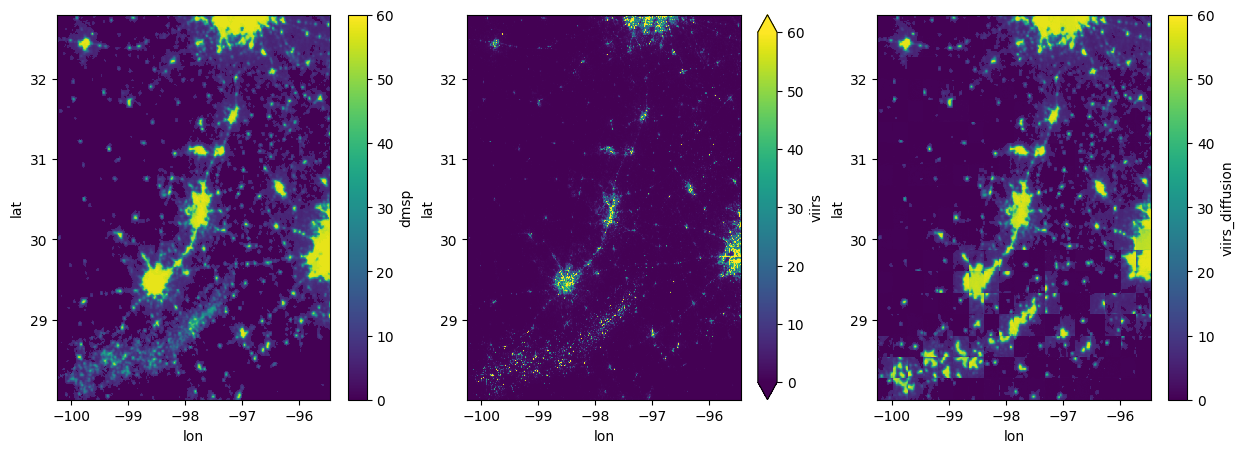

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=3,nrows=1, figsize=(15,5))
ds_dmsp_.dmsp.plot(ax=ax[0], vmax=60)
ds_dmsp_.viirs.plot(ax=ax[1], vmin=0, vmax=60)
ds_dmsp_.viirs_diffusion.plot(ax=ax[2], vmax=60)